# Analysis of published papers

In [1]:
%run setup.py

In [2]:
# df_factInv = pd.read_csv(os.path.join(filepath,'factInvited.csv'), index_col=0)
# df_factPro = pd.read_csv(os.path.join(filepath,'factProceedings.csv'), index_col=0)
df_inv = pd.read_csv(os.path.join(filepath,'paper_count_per_year_invited.csv'))
df_pro = pd.read_csv(os.path.join(filepath,'paper_count_per_year_proceedings.csv'))
df_pro['Year Count'] = df_pro['Year Count'].replace(0,1)
df_inv['Year Count'] = df_inv['Year Count'].replace(0,1)

In [3]:
paper_per_pro = df_pro['Year Count'].values
paper_per_inv = df_inv['Year Count'].values

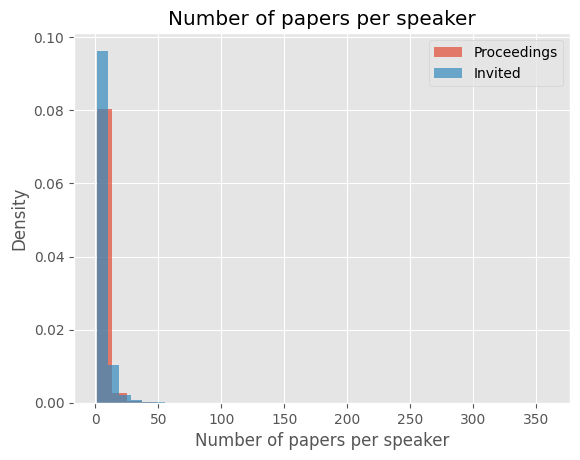

In [8]:
plt.hist(paper_per_pro, bins=30, alpha=0.7, label='Proceedings',density=True)
plt.hist(paper_per_inv, bins=30, alpha=0.7, label='Invited',density=True)
plt.legend(loc='upper right')
plt.xlabel('Number of papers per speaker')
plt.ylabel('Density')
plt.title('Number of papers per speaker')
plt.show()

In [5]:
# min(paper_per_pro), max(paper_per_pro)
bins = np.logspace(np.log10(min(paper_per_pro)), np.log10(max(paper_per_pro)), 20)
hist,edges = np.histogram(paper_per_pro, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2.

bins1 = np.logspace(np.log10(min(paper_per_inv)), np.log10(max(paper_per_inv)), 20)
hist1,edges1 = np.histogram(paper_per_inv, bins=bins, density=True)
x1 = (edges1[1:]+edges1[:-1])/2.

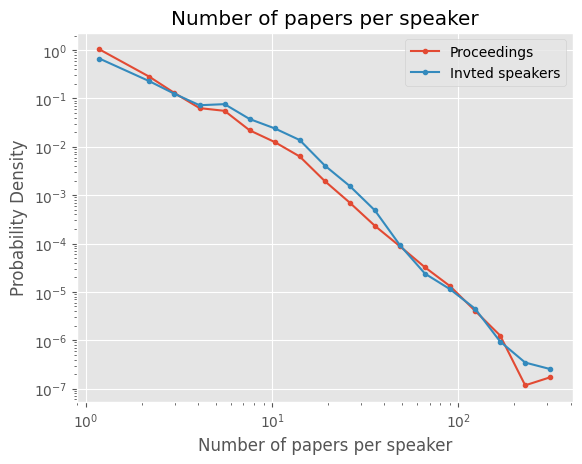

In [6]:
xx,yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j>0])
xx1,yy1 = zip(*[(i,j) for (i,j) in zip(x1,hist1) if j>0])

fig,ax = plt.subplots()
ax.plot(xx, yy, label='Proceedings',marker='.')
ax.plot(xx1, yy1, label='Invted speakers',marker='.')
ax.set_xlabel('Number of papers per speaker')
ax.set_ylabel('Probability Density')
ax.set_title('Number of papers per speaker')
ax.legend(loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')

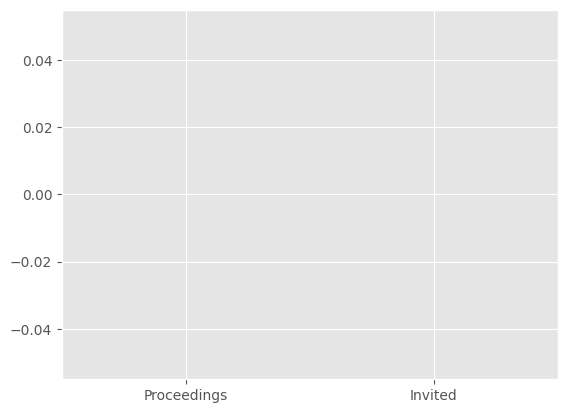

In [35]:
# plot boxplot of the number of papers per speaker 
plt.boxplot([paper_per_pro, paper_per_inv], labels=['Proceedings', 'Invited'])
plt.show()

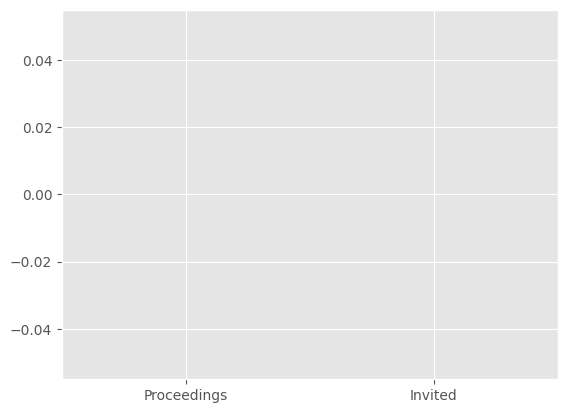

In [36]:
plt.boxplot([paper_per_pro, paper_per_inv], labels=['Proceedings', 'Invited'], showfliers=False)
plt.show()

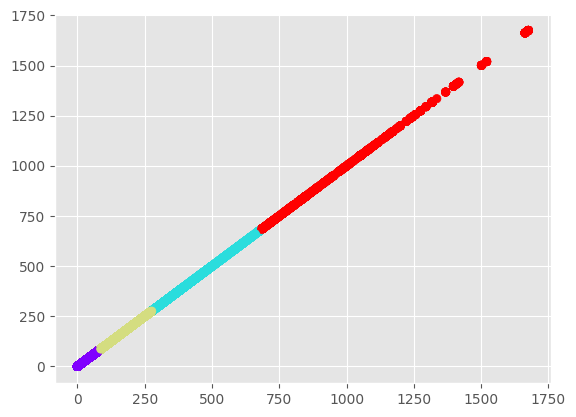

In [40]:
# Create a KNN model to cluster the data
from sklearn.cluster import KMeans

# Fit the model
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_factPro[['Paper Count']])

# Check the cluster labels generated for each row in the dataframe
df_factPro['labels'] = kmeans.labels_ 

# Plot the data
plt.scatter(df_factPro['Paper Count'], df_factPro['Paper Count'], c=df_factPro['labels'], cmap='rainbow')
plt.show()
